# Predicting ship collisions in the arctic sea

In [51]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.image as gumimage
import itertools

**Regarding the function below**<br>
The getIterations function takes in an array of items that would be the inputs to the "or" gate in the Fault Tree, The variable that would be the output to the fault tree and then the decision network itself

In [52]:
#Helper methods
def count(items):
    num = 0
    for i in items:
        if i == 1:
            num = num+1
    if num<len(items)/2: 
        return True
    else:
        return False
    
def even(num):
    if num%2==0:
        return True
    else:
        return False

def getIterations(vars, mainVariable, bn):
    lst = list(itertools.product([0, 1], repeat=len(vars)))
    items = {}
    checker = 0
    for i in lst:
        for j in range(len(vars)):
            items[vars[j]] = i[j]
        if count(i):
            bn.cpt(mainVariable)[items] = [1-0.00004396, 0.00004396]
        else:
            bn.cpt(mainVariable)[items] = [0.00004396, 1-0.00004396]


# Construction

## Define Nodes

In [53]:
#Define Nodes
bn = gum.BayesNet()
#Regular Nodes
var_names = ["Waves", "HighWind", "Fog", "PackIce", "RidgeIceAndIceberg", "Collision", "Environment", "HighSpeed", "EquipmentError", "RadarFailure", "HumanError", "ShipFault", "Navigation"]
waves, highwind, fog, packice, ridgeiceandiceberg, collision, environment, highspeed, equipmenterror, radarfailure, humanerror, shipfault, navigation = [bn.add(gum.LabelizedVariable(name, name, 2)) for name in var_names]
#The above are binary variables, region isn't so do that manually:
region = bn.add(gum.LabelizedVariable("Region", "Region", ["region1", "region2", "region3", "region4", "region5"]))
gnb.showBN(bn,size="15")

## Arcs

Add in Arcs

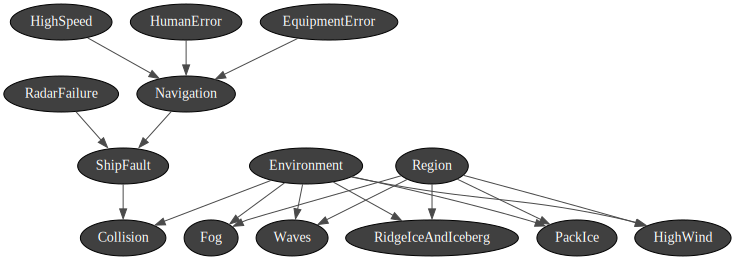

In [54]:
bn.addArc(region, waves)
bn.addArc(region, highwind)
bn.addArc(region, fog)
bn.addArc(region, packice)
bn.addArc(region, ridgeiceandiceberg)
bn.addArc(environment, waves)
bn.addArc(environment, highwind)
bn.addArc(environment, fog)
bn.addArc(environment, packice)
bn.addArc(environment, ridgeiceandiceberg)
bn.addArc(navigation, shipfault)
bn.addArc(radarfailure, shipfault)
bn.addArc(humanerror, navigation)
bn.addArc(equipmenterror, navigation)
bn.addArc(highspeed, navigation)
bn.addArc(environment, collision)
bn.addArc(shipfault, collision)
gnb.showBN(bn,size="15")


# CPTs


## CPT Region


In [55]:
#For Region
bn.cpt("Region").fillWith([1/5, 1/5, 1/5, 1/5, 1/5])
bn.cpt("Region")

(pyAgrum.Potential<double>@000001ECD45FEEE0) 
  Region                                         |
region1  |region2  |region3  |region4  |region5  |
---------|---------|---------|---------|---------|
 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |

## CPTs for oberserved nodes

PackIce

In [56]:
bn.cpt("PackIce")[{"Region":"region1", "Environment":0}] = [1-0.0053, 0.0053]
bn.cpt("PackIce")[{"Region":"region2", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("PackIce")[{"Region":"region3", "Environment":0}] = [1-0.0037, 0.0037]
bn.cpt("PackIce")[{"Region":"region4", "Environment":0}] = [1-0.001, 0.001]
bn.cpt("PackIce")[{"Region":"region5", "Environment":0}] = [1-0.0001, 0.0001]
bn.cpt("PackIce")[{"Region":"region1", "Environment":1}] = [0.0053, 1-0.0053]
bn.cpt("PackIce")[{"Region":"region2", "Environment":1}] = [0.01, 1-0.01]
bn.cpt("PackIce")[{"Region":"region3", "Environment":1}] = [0.0037, 1-0.0037]
bn.cpt("PackIce")[{"Region":"region4", "Environment":1}] = [0.001, 1-0.001]
bn.cpt("PackIce")[{"Region":"region5", "Environment":1}] = [0.0001, 1-0.0001]
bn.cpt("PackIce")

(pyAgrum.Potential<double>@000001ECD45FECE0) 
             ||  PackIce          |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9947  | 0.0053  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9963  | 0.0037  |
region|0     || 0.9990  | 0.0010  |
region|0     || 0.9999  | 0.0001  |
region|1     || 0.0053  | 0.9947  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0037  | 0.9963  |
region|1     || 0.0010  | 0.9990  |
region|1     || 0.0001  | 0.9999  |

Fog (X7)

In [57]:
bn.cpt("Fog")[{"Region":"region1", "Environment":0}] = [1-0.05, 0.05]
bn.cpt("Fog")[{"Region":"region2", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("Fog")[{"Region":"region3", "Environment":0}] = [1-0.05, 0.05]
bn.cpt("Fog")[{"Region":"region4", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("Fog")[{"Region":"region5", "Environment":0}] = [1-0.0005, 0.0005]
bn.cpt("Fog")[{"Region":"region1", "Environment":1}] = [0.05, 1-0.05]
bn.cpt("Fog")[{"Region":"region2", "Environment":1}] = [0.01, 1-0.01]
bn.cpt("Fog")[{"Region":"region3", "Environment":1}] = [0.05, 1-0.05]
bn.cpt("Fog")[{"Region":"region4", "Environment":1}] = [0.01, 1-0.01]
bn.cpt("Fog")[{"Region":"region5", "Environment":1}] = [0.0005, 1-0.0005]
bn.cpt("Fog")

(pyAgrum.Potential<double>@000001ECD45FEB60) 
             ||  Fog              |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9500  | 0.0500  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9500  | 0.0500  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9995  | 0.0005  |
region|1     || 0.0500  | 0.9500  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0500  | 0.9500  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0005  | 0.9995  |

RidgeIceAndIceberg (X14)

In [58]:
bn.cpt("RidgeIceAndIceberg")[{"Region":"region1", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region2", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region3", "Environment":0}] = [1-0.05, 0.05]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region4", "Environment":0}] = [1-0.01, 0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region5", "Environment":0}] = [1-0.005, 0.005]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region1", "Environment":1}] = [0.01, 1-0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region2", "Environment":1}] = [0.01, 1-0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region3", "Environment":1}] = [0.05, 1-0.05]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region4", "Environment":1}] = [0.01, 1-0.01]
bn.cpt("RidgeIceAndIceberg")[{"Region":"region5", "Environment":1}] = [0.005, 1-0.005]
bn.cpt("RidgeIceAndIceberg")

(pyAgrum.Potential<double>@000001ECD45FEC60) 
             ||  RidgeIceAndIceber|
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9500  | 0.0500  |
region|0     || 0.9900  | 0.0100  |
region|0     || 0.9950  | 0.0050  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0500  | 0.9500  |
region|1     || 0.0100  | 0.9900  |
region|1     || 0.0050  | 0.9950  |

Waves (X9)

In [59]:
bn.cpt("Waves")[{"Region":"region1", "Environment":0}] = [1-0.0023, 0.0023]
bn.cpt("Waves")[{"Region":"region2", "Environment":0}] = [1-0.0053, 0.0053]
bn.cpt("Waves")[{"Region":"region3", "Environment":0}] = [1-0.001, 0.001]
bn.cpt("Waves")[{"Region":"region4", "Environment":0}] = [1-0.00083, 0.00083]
bn.cpt("Waves")[{"Region":"region5", "Environment":0}] = [1-0.0001, 0.0001]
bn.cpt("Waves")[{"Region":"region1", "Environment":1}] = [0.0023, 1-0.0023]
bn.cpt("Waves")[{"Region":"region2", "Environment":1}] = [0.0053, 1-0.0053]
bn.cpt("Waves")[{"Region":"region3", "Environment":1}] = [0.001, 1-0.001]
bn.cpt("Waves")[{"Region":"region4", "Environment":1}] = [0.00083, 1-0.00083]
bn.cpt("Waves")[{"Region":"region5", "Environment":1}] = [0.0001, 1-0.0001]
bn.cpt("Waves")

(pyAgrum.Potential<double>@000001ECD45FEE40) 
             ||  Waves            |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9977  | 0.0023  |
region|0     || 0.9947  | 0.0053  |
region|0     || 0.9990  | 0.0010  |
region|0     || 0.9992  | 0.0008  |
region|0     || 0.9999  | 0.0001  |
region|1     || 0.0023  | 0.9977  |
region|1     || 0.0053  | 0.9947  |
region|1     || 0.0010  | 0.9990  |
region|1     || 0.0008  | 0.9992  |
region|1     || 0.0001  | 0.9999  |

HighWind (X8)

In [60]:
bn.cpt("HighWind")[{"Region":"region1", "Environment":0}] = [1-0.0017, 0.0017]
bn.cpt("HighWind")[{"Region":"region2", "Environment":0}] = [1-0.0053, 0.0053]
bn.cpt("HighWind")[{"Region":"region3", "Environment":0}] = [1-0.0017, 0.0017]
bn.cpt("HighWind")[{"Region":"region4", "Environment":0}] = [1-0.0005, 0.0005]
bn.cpt("HighWind")[{"Region":"region5", "Environment":0}] = [1-0.0001, 0.0001]
bn.cpt("HighWind")[{"Region":"region1", "Environment":1}] = [0.0017, 1-0.0017]
bn.cpt("HighWind")[{"Region":"region2", "Environment":1}] = [0.0053, 1-0.0053]
bn.cpt("HighWind")[{"Region":"region3", "Environment":1}] = [0.0017, 1-0.0017]
bn.cpt("HighWind")[{"Region":"region4", "Environment":1}] = [0.0005, 1-0.0005]
bn.cpt("HighWind")[{"Region":"region5", "Environment":1}] = [0.0001, 1-0.0001]
bn.cpt("HighWind")

(pyAgrum.Potential<double>@000001ECD45FF1A0) 
             ||  HighWind         |
Region|Enviro||0        |1        |
------|------||---------|---------|
region|0     || 0.9983  | 0.0017  |
region|0     || 0.9947  | 0.0053  |
region|0     || 0.9983  | 0.0017  |
region|0     || 0.9995  | 0.0005  |
region|0     || 0.9999  | 0.0001  |
region|1     || 0.0017  | 0.9983  |
region|1     || 0.0053  | 0.9947  |
region|1     || 0.0017  | 0.9983  |
region|1     || 0.0005  | 0.9995  |
region|1     || 0.0001  | 0.9999  |

HighSpeed (X2)

In [61]:
bn.cpt("HighSpeed").fillWith([1-0.0068, 0.0068])

(pyAgrum.Potential<double>@000001ECD45FEC80) 
  HighSpeed        |
0        |1        |
---------|---------|
 0.9932  | 0.0068  |

EquipmentError (X3)

In [62]:
bn.cpt("EquipmentError").fillWith([1-0.008563, 0.008563])

(pyAgrum.Potential<double>@000001ECD45FF1E0) 
  EquipmentError   |
0        |1        |
---------|---------|
 0.9914  | 0.0086  |

HumanError (X5)

In [63]:
bn.cpt("HumanError").fillWith([1-0.0074, 0.0074])

(pyAgrum.Potential<double>@000001ECD45FF1C0) 
  HumanError       |
0        |1        |
---------|---------|
 0.9926  | 0.0074  |

RadarFailure (X4)

In [64]:
bn.cpt("RadarFailure")[{"ShipFault":0}] = [1-0.0234, 0.0234]
bn.cpt("RadarFailure")[{"ShipFault":1}] = [1-0.0234, 0.0234]
bn.cpt("RadarFailure")

(pyAgrum.Potential<double>@000001ECD45FF0E0) 
  RadarFailure     |
0        |1        |
---------|---------|
 0.9766  | 0.0234  |

## CPT for conditionals

Navigation

In [65]:
vars = ["HumanError", "HighSpeed", "EquipmentError"]
getIterations(vars, "Navigation", bn)
print("The below rounds to 4 decimal places but it is correct!")
bn.cpt("Navigation")


The below rounds to 4 decimal places but it is correct!


(pyAgrum.Potential<double>@000001ECD45FEEC0) 
                    ||  Navigation       |
HumanE|Equipm|HighSp||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 1.0000  | 0.0000  |
1     |0     |0     || 1.0000  | 0.0000  |
0     |1     |0     || 1.0000  | 0.0000  |
1     |1     |0     || 0.0000  | 1.0000  |
0     |0     |1     || 1.0000  | 0.0000  |
1     |0     |1     || 0.0000  | 1.0000  |
0     |1     |1     || 0.0000  | 1.0000  |
1     |1     |1     || 0.0000  | 1.0000  |

ShipFault

In [66]:
bn.cpt("ShipFault")[{"RadarFailure": 0, "Navigation": 0}]= [1, 0]
bn.cpt("ShipFault")[{"RadarFailure": 0, "Navigation": 1}]= [0.25, 0.75]
bn.cpt("ShipFault")[{"RadarFailure": 1, "Navigation": 0}]= [0.5, 0.5]
bn.cpt("ShipFault")[{"RadarFailure": 1, "Navigation": 1}]= [0, 1]
bn.cpt("ShipFault")

(pyAgrum.Potential<double>@000001ECD45FEAC0) 
             ||  ShipFault        |
Naviga|RadarF||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.2500  | 0.7500  |
0     |1     || 0.5000  | 0.5000  |
1     |1     || 0.0000  | 1.0000  |

Environment

In [67]:
bn.cpt("Environment").fillWith([1-0.4247, 0.4247])
bn.cpt("Environment")

(pyAgrum.Potential<double>@000001ECD45FED00) 
  Environment      |
0        |1        |
---------|---------|
 0.5753  | 0.4247  |

Collision

In [68]:
bn.cpt("Collision")[{"ShipFault": 0,  "Environment": 0}]=[1, 0] #No Collision
bn.cpt("Collision")[{"ShipFault": 0,  "Environment": 1}]=[0.9, 0.1] #Average of table 9
bn.cpt("Collision")[{"ShipFault": 1,  "Environment": 0}]=[0.9, 0.1] #Average of table 8
bn.cpt("Collision")[{"ShipFault": 1,  "Environment": 1}]=[0.8, 0.2] #Average of table 8
bn.cpt("Collision")

(pyAgrum.Potential<double>@000001ECD45FEE00) 
             ||  Collision        |
Enviro|ShipFa||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.9000  | 0.1000  |
0     |1     || 0.9000  | 0.1000  |
1     |1     || 0.8000  | 0.2000  |

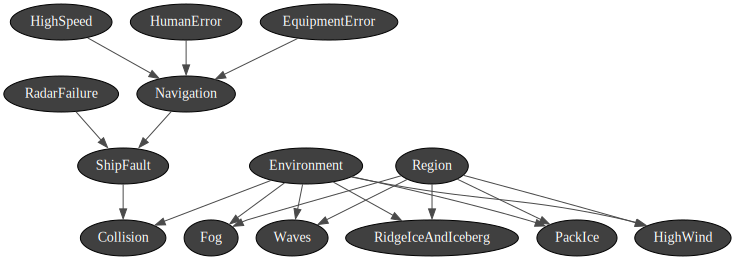

In [69]:
gnb.showBN(bn,size="15")
gumimage.export(bn, filename="Bayesian.png",size = 15)

Inference

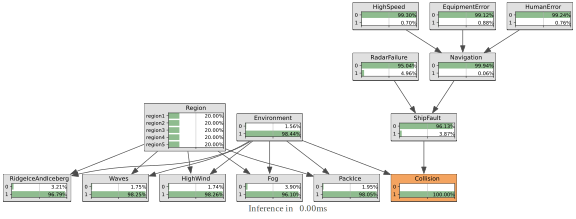

In [70]:
ie = gum.VariableElimination(bn)
gnb.showInference(bn, evs = {"Collision":1}, engine = ie)
gumimage.exportInference(bn, filename="BayesianInferenceExample.png",evs = {"Collision":1}, engine = ie)

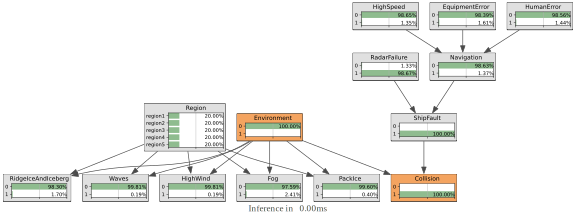

In [71]:
ie = gum.VariableElimination(bn)
gnb.showInference(bn, evs = {"Collision":1, "Environment":0}, engine = ie)
gumimage.exportInference(bn, filename="BayesianInferenceExamplewithnoEnvironment.png",evs = {"Collision":1, "Environment":0}, engine = ie)

Export the model

In [72]:
print(gum.availableBNExts())

bif|dsl|net|bifxml|o3prm|uai|xdsl


In [74]:
gum.saveBN(bn,"BayesianModel.bif")